In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

dataset = pd.read_csv('wine.csv')
df = pd.DataFrame(dataset)
df.head(6)

from sklearn.preprocessing import StandardScaler
df_sc = StandardScaler().fit_transform(df)
pd.DataFrame(df_sc, columns=df.columns).head(6)

X = df.iloc[:, 0:23].values
Y = df.iloc[:, -1].values

In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_features = pca.fit_transform(df_sc)
print('Shape before PCA: ', df_sc.shape)
print('Shape after PCA: ', pca_features.shape)

pca_df = pd.DataFrame(
    data=pca_features,
    columns=['PC1', 'PC2', 'PC3']
)

explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratios: {explained_variance}")

Shape before PCA:  (178, 14)
Shape after PCA:  (178, 3)
Explained Variance Ratios: [0.39542486 0.17836259 0.10329102]


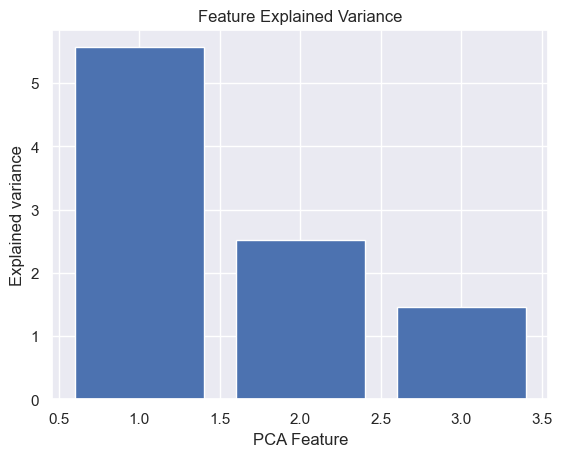

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

sns.set()

pca = PCA(n_components=3)
pca.fit_transform(df_sc)

plt.bar(
    range(1, len(pca.explained_variance_) + 1),
    pca.explained_variance_
)

plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

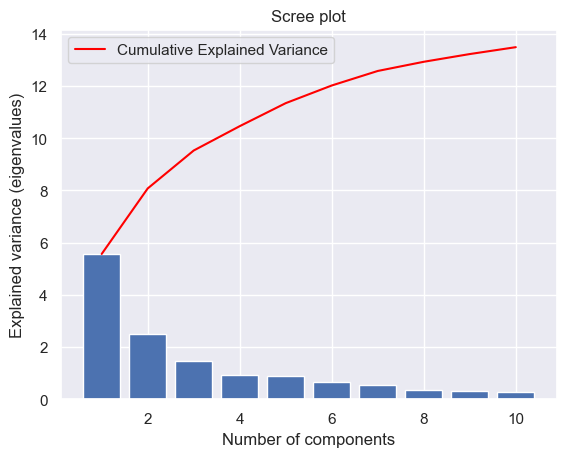

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

sns.set()

pca = PCA(n_components=10)
reduced_features = pca.fit_transform(df_sc)

plt.bar(
    range(1, len(pca.explained_variance_) + 1),
    pca.explained_variance_
)

plt.plot(
    range(1, len(pca.explained_variance_) + 1),
    np.cumsum(pca.explained_variance_),
    c='red',
    label='Cumulative Explained Variance'
)

plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (eigenvalues)')
plt.title('Scree plot')
plt.show()

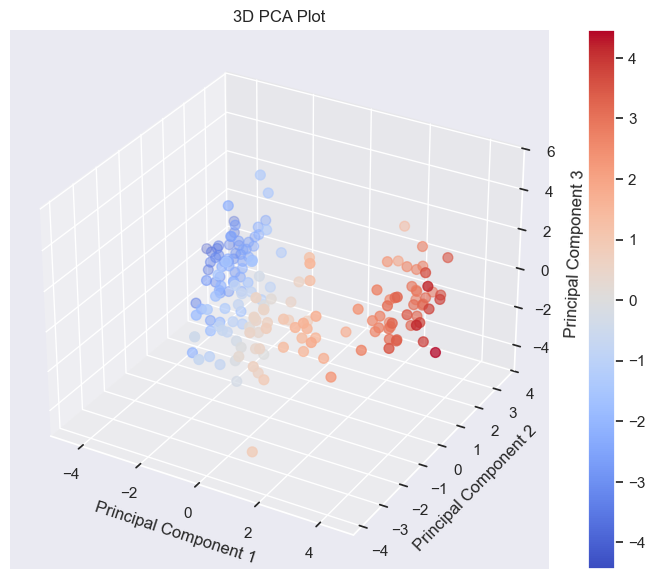

In [44]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    pca_df['PC1'], pca_df['PC2'], pca_df['PC3'],
    c=pca_df['PC1'], cmap='coolwarm', s=50
)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA Plot')

plt.colorbar(scatter)
plt.show()

In [45]:
loadings = pca.components_


feature_names = [
    'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols', 
    'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 
    'Color.int', 'Hue', 'OD', 'Proline', 'Wine'
]
n_features = len(feature_names)

pc_list = [f'PC{i}' for i in range(1, len(loadings) + 1)]

pc_loadings = dict(zip(pc_list, loadings))

loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
loadings_df = loadings_df.set_index('feature_names')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
feature_names,,,,,,,,,,
Alcohol,-0.136325,0.484161,-0.207401,-0.081918,-0.250894,0.135171,-0.092699,0.421544,-0.450191,-0.311280
Malic.acid,0.222676,0.223591,0.088796,0.469888,-0.188600,0.598419,0.374370,0.087576,-0.006026,0.325924
Ash,-0.002258,0.315856,0.626102,-0.249841,-0.093524,0.108000,-0.167089,-0.172080,0.262494,0.124523
Acl,0.224298,-0.011616,0.611990,0.071993,0.046567,-0.088112,-0.268725,0.413249,-0.118633,-0.157168
Mg,-0.124630,0.300551,0.130985,-0.163214,0.778330,0.144838,0.329580,-0.148812,-0.252536,-0.127734
Phenols,-0.359264,0.067120,0.146508,0.190985,-0.144666,-0.148097,-0.037898,-0.363439,-0.406374,0.307723
Flavanoids,-0.390712,-0.001313,0.150963,0.144617,-0.112006,-0.062473,-0.067732,-0.175405,-0.090919,0.140440
Nonflavanoid.phenols,0.267001,0.026989,0.169976,-0.328013,-0.432579,-0.258686,0.611112,-0.230751,-0.159123,-0.240543
Proanth,-0.279063,0.041223,0.149880,0.462758,0.091588,-0.466278,0.422923,0.343739,0.265787,-0.108696


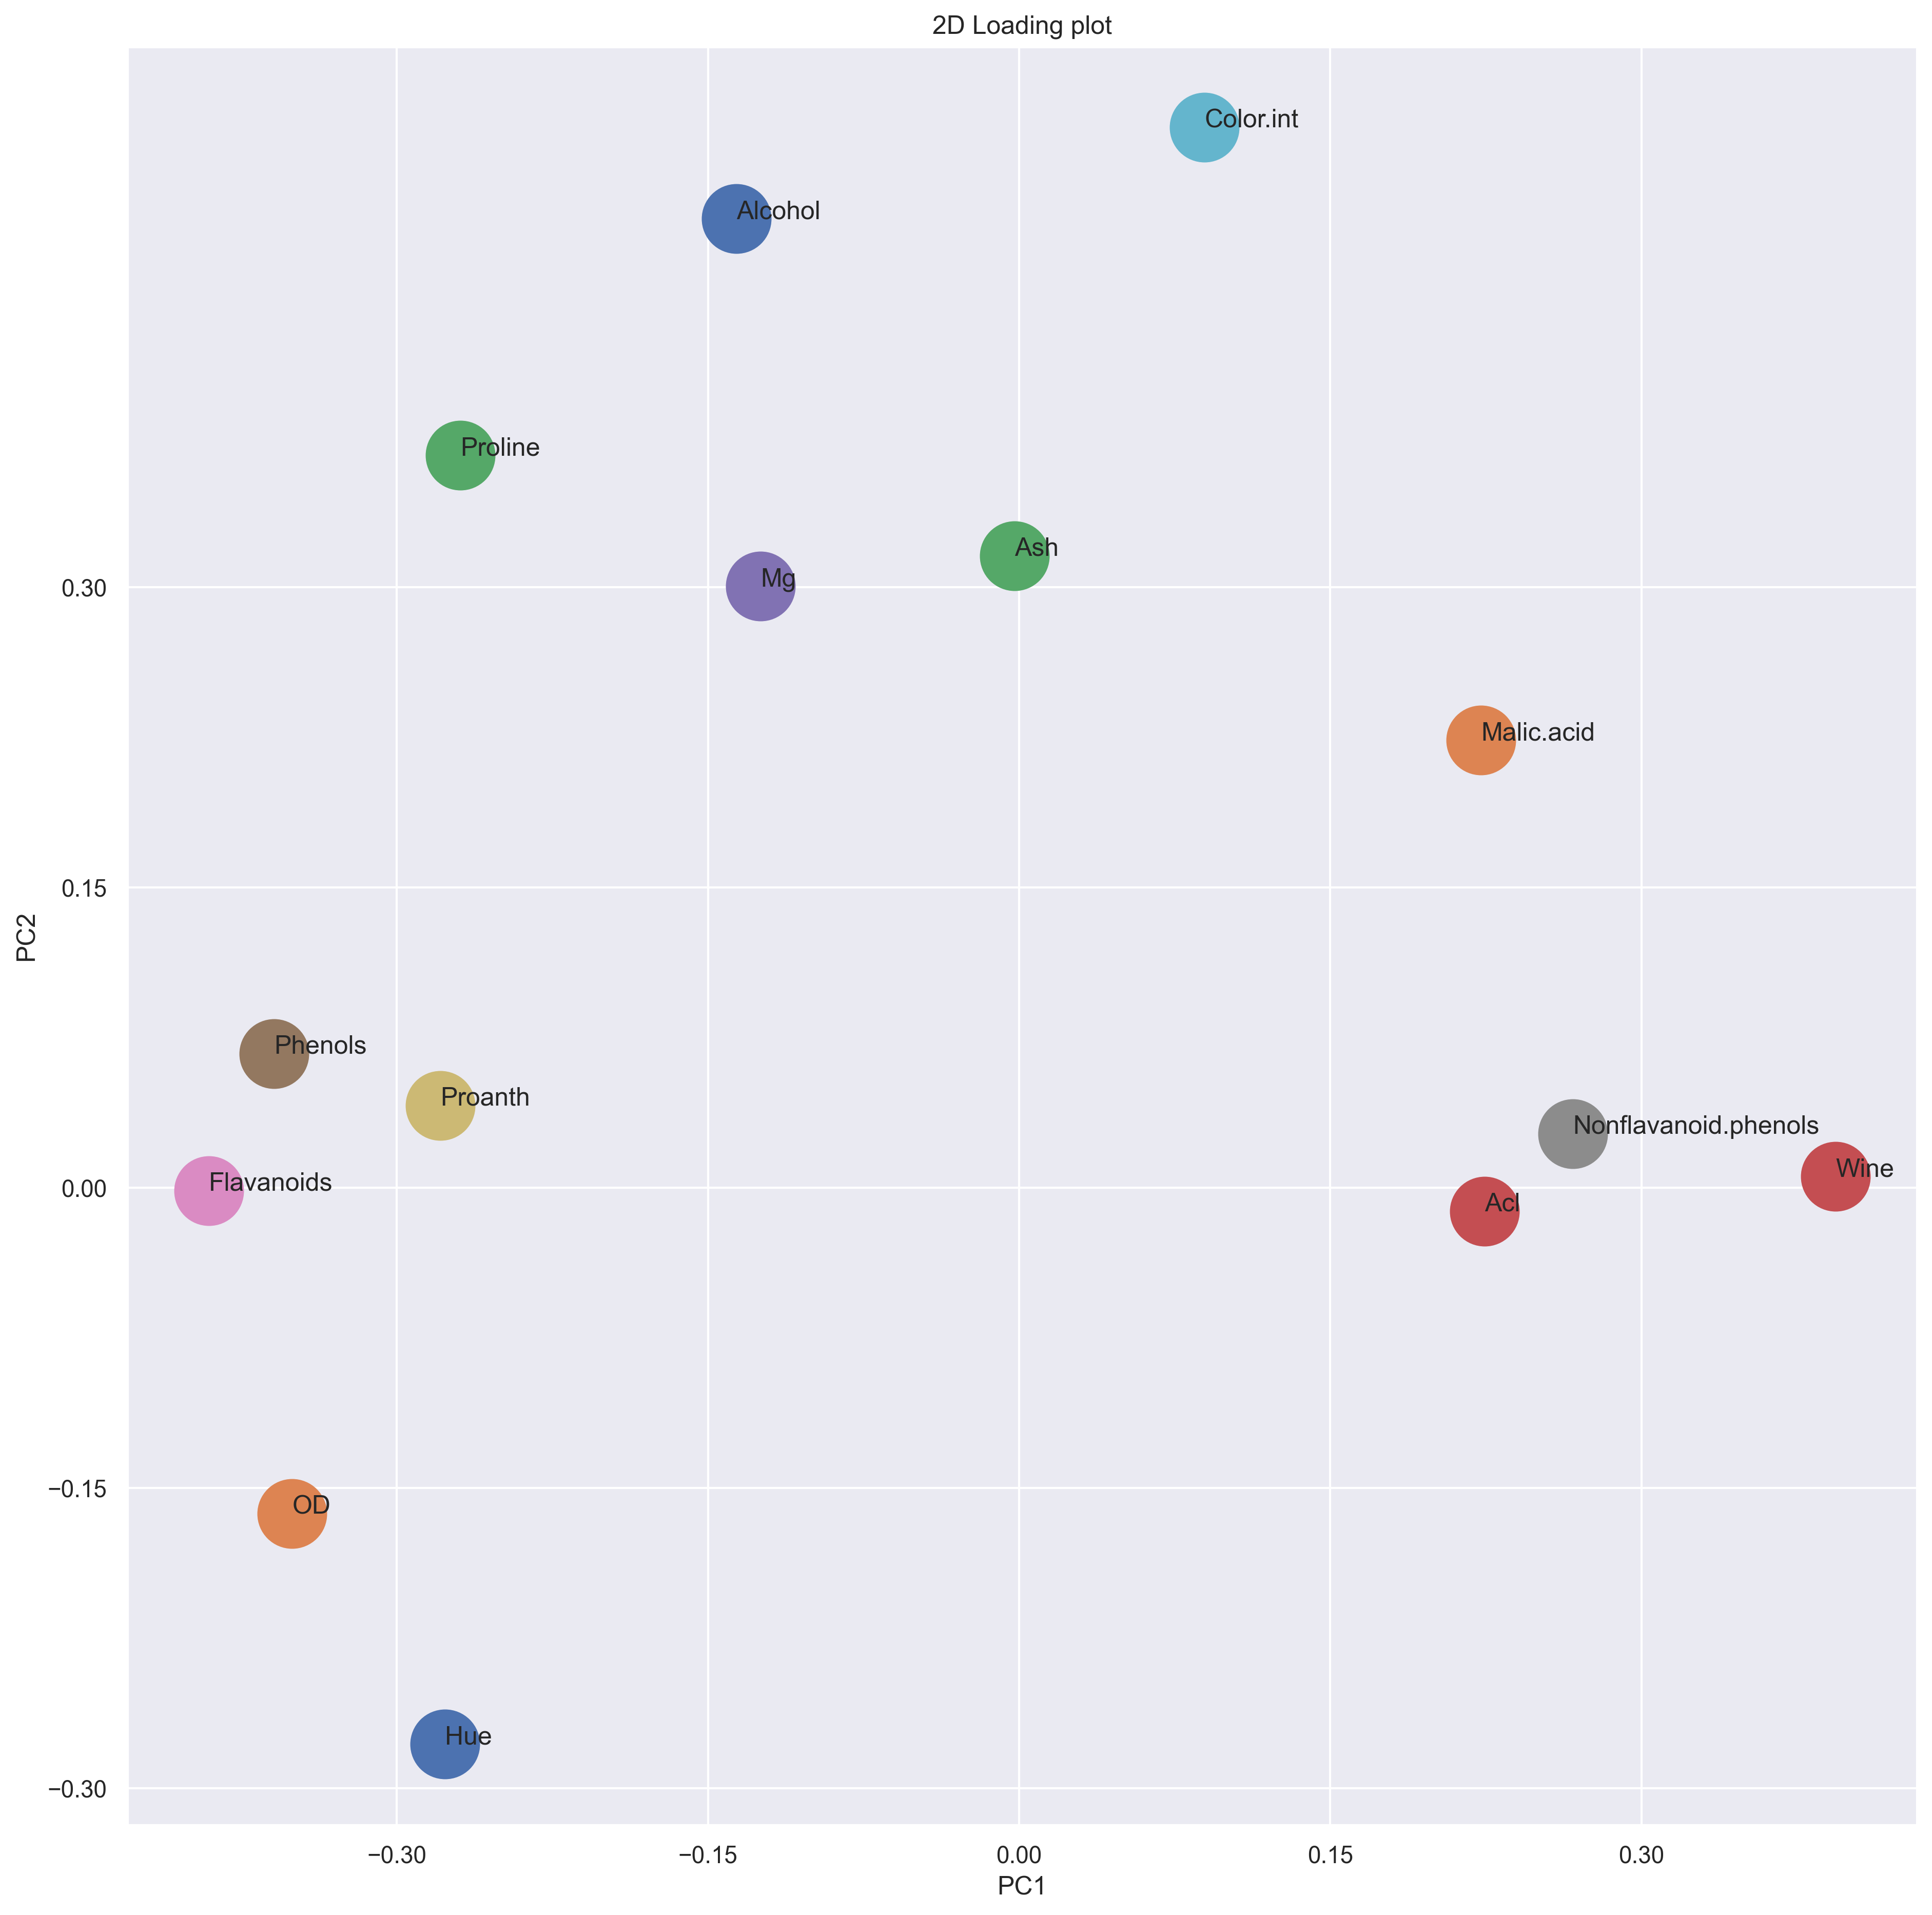

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

figure(figsize=(15, 15), dpi=300)
xs = loadings[0]
ys = loadings[1]

for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=1000)
    plt.text(xs[i], ys[i], varnames)

xticks = np.linspace(-0.3, 0.3, num=5)
yticks = np.linspace(-0.3, 0.3, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D Loading plot')
plt.show()

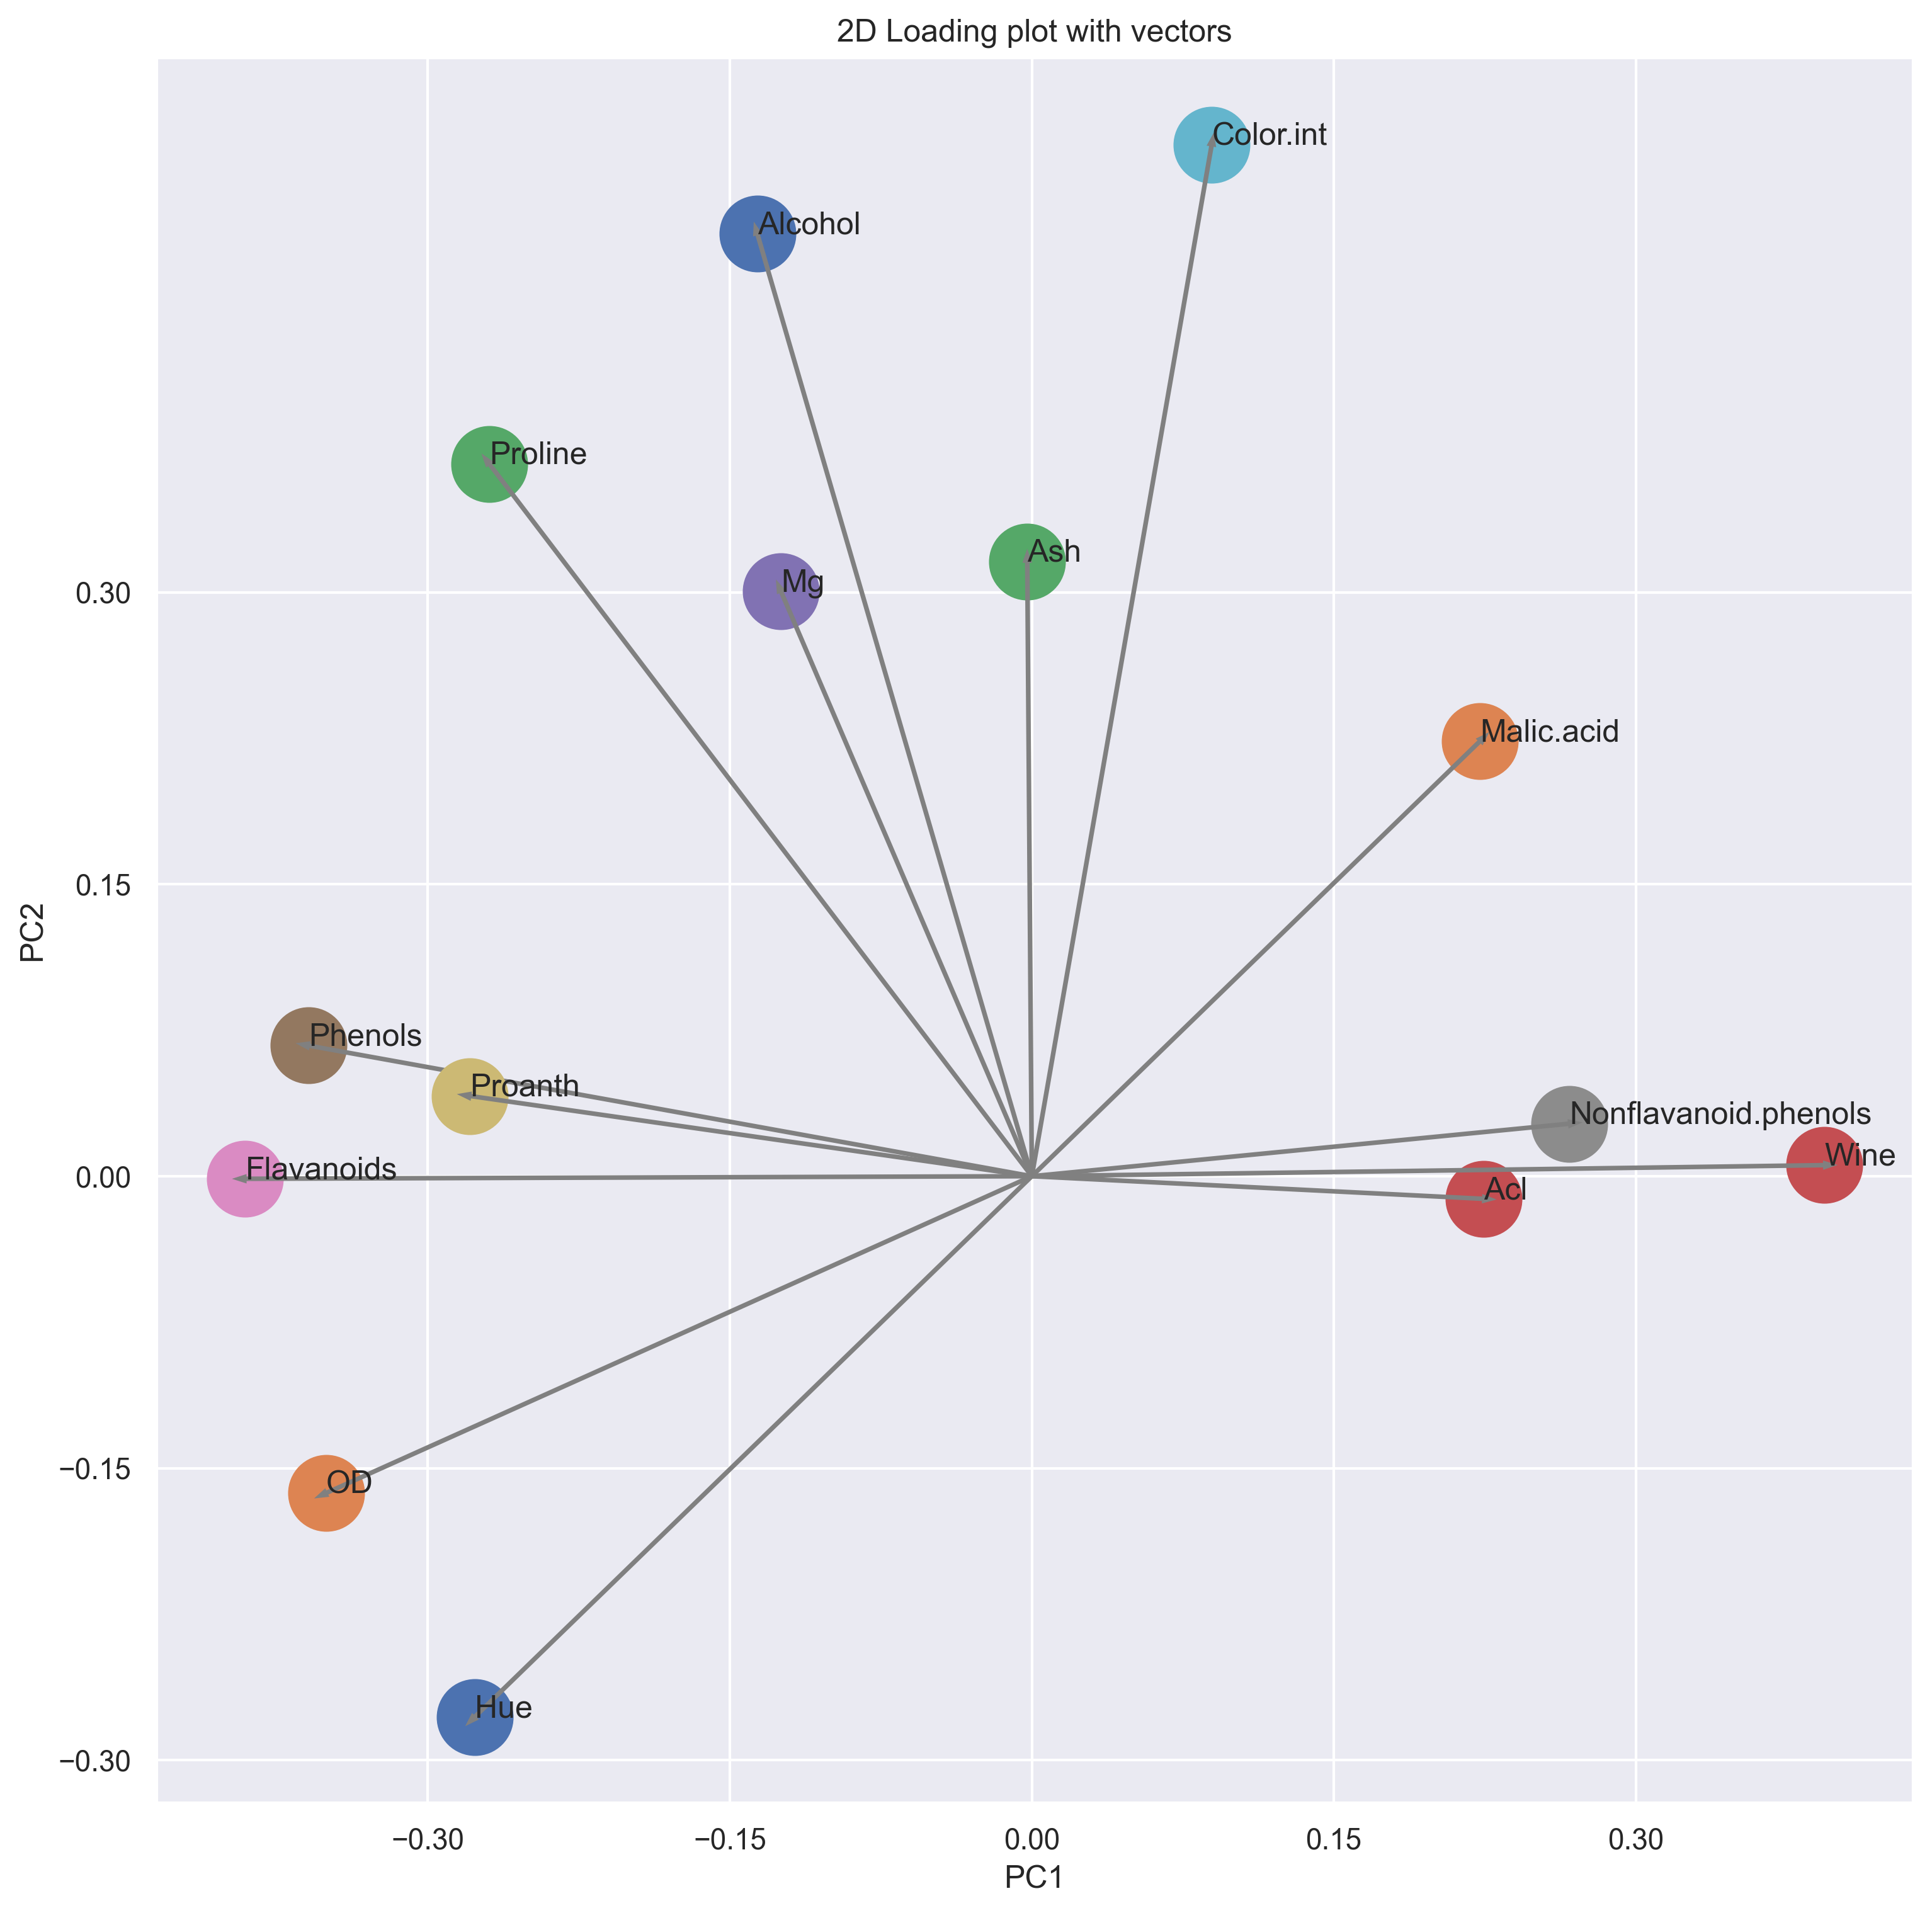

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

figure(figsize=(12, 12), dpi=300)
xs = loadings[0]
ys = loadings[1]

for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=800)
    plt.arrow(
        0, 0,
        xs[i], ys[i],
        color="grey",
        linewidth=None,
        head_width=None
    )
    plt.text(xs[i], ys[i], varnames)

xticks = np.linspace(-0.3, 0.3, num=5)
yticks = np.linspace(-0.3, 0.3, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D Loading plot with vectors')
plt.show()

In [48]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set(font_scale=1.5)

dataset = pd.read_csv('wine.csv')
df = pd.DataFrame(dataset)

X = df.iloc[:, 0:23].values
y = df.iloc[:, -1].values

X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=3)
pca_features = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(
    data=pca_features,
    columns=['PC1', 'PC2', 'PC3']
)

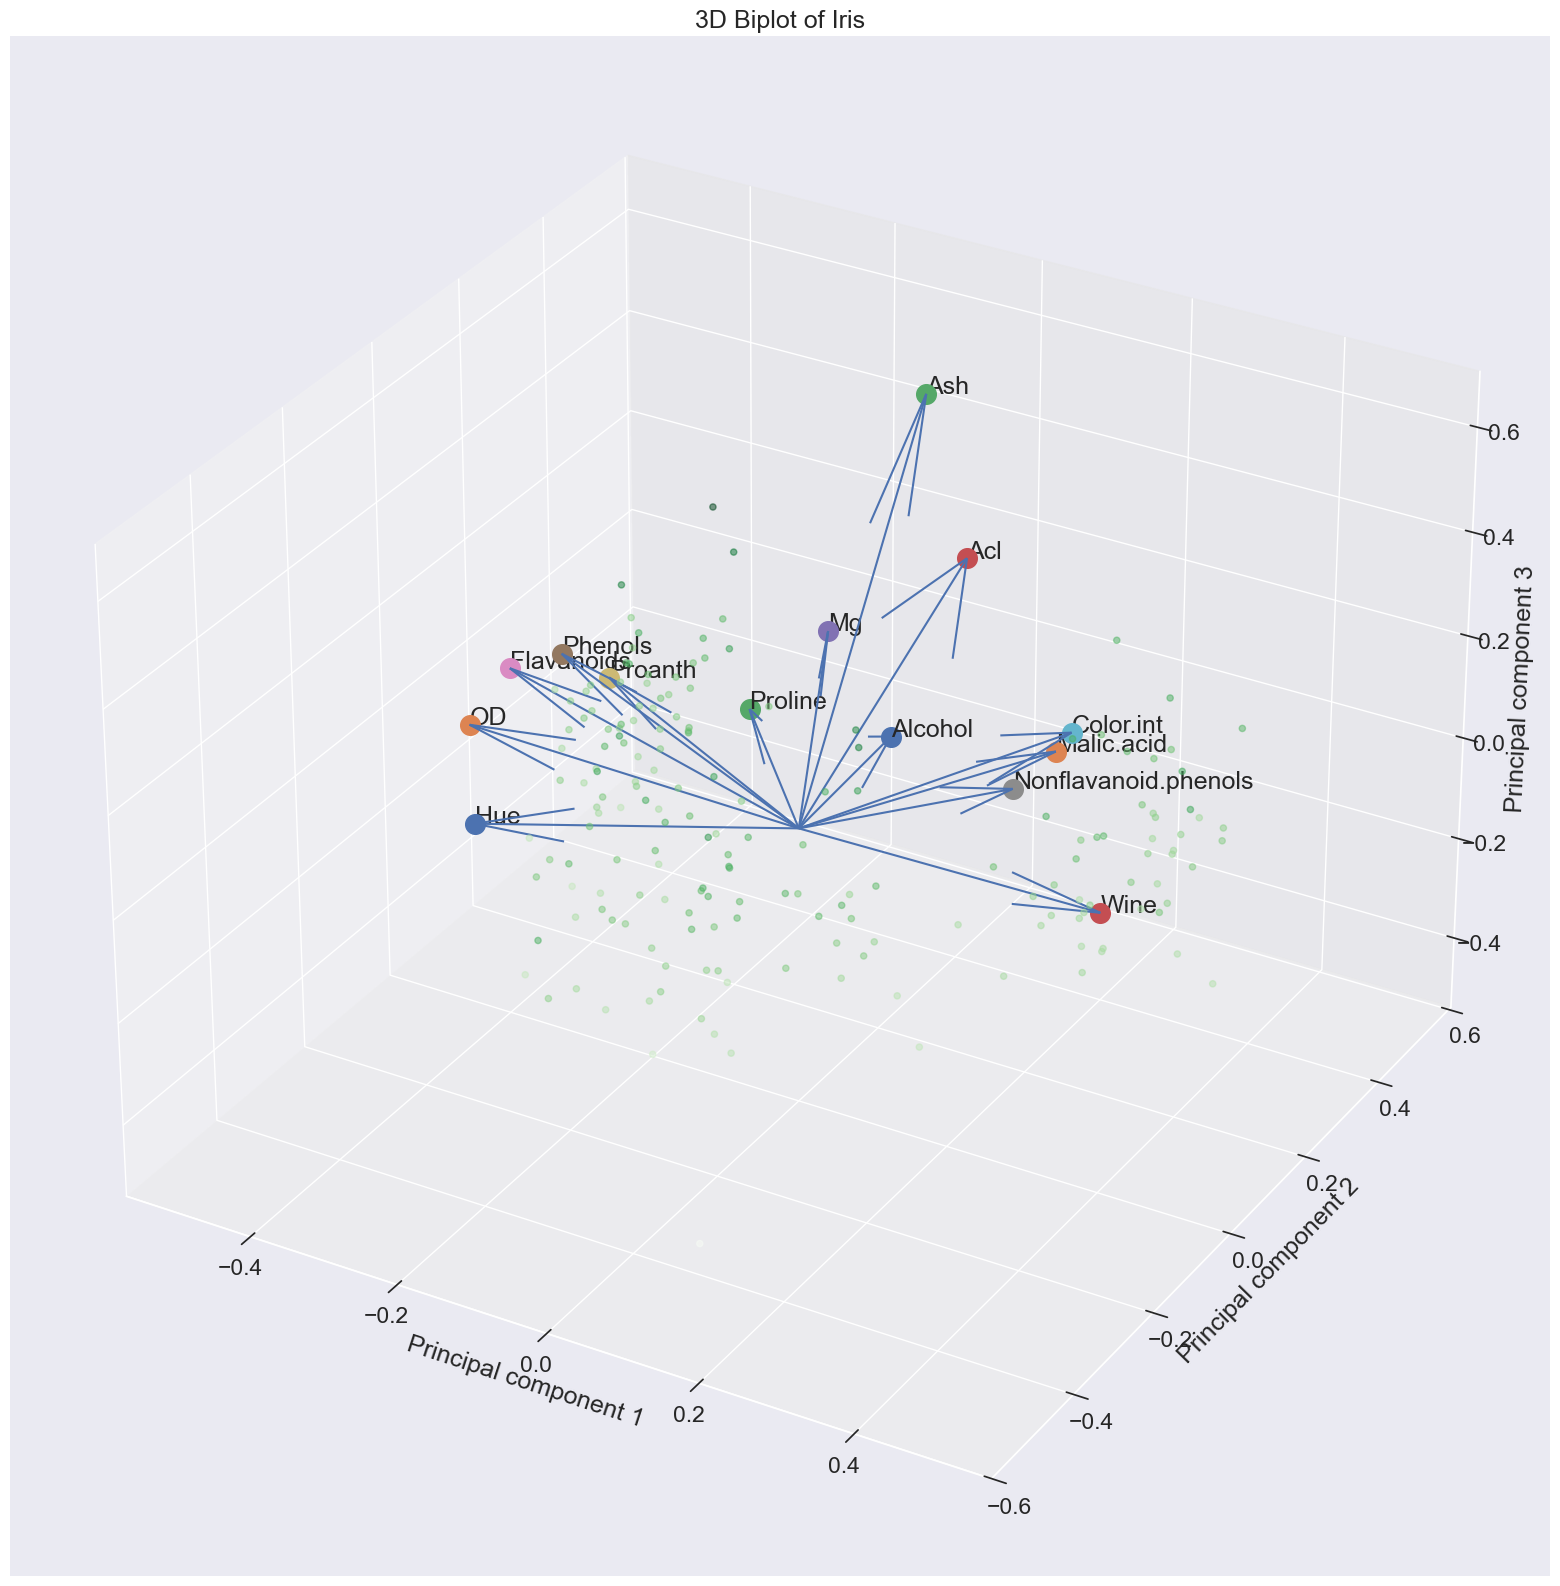

In [49]:
target_names = {
    0: 'Toxicity Class 1',
    1: 'Toxicity Class 2',
    2: 'Toxicity Class 3'
}

pca_df['target'] = y
pca_df['target'] = pca_df['target'].map(target_names)

pca_df_scaled = pca_df.copy()
scaler_df = pca_df[['PC1', 'PC2', 'PC3']]
scaler = 1 / (scaler_df.max() - scaler_df.min())

for index in scaler.index:
    pca_df_scaled[index] *= scaler[index]

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')

xdata = pca_df_scaled['PC1']
ydata = pca_df_scaled['PC2']
zdata = pca_df_scaled['PC3']

ax.scatter3D(
    xdata,
    ydata,
    zdata,
    c=zdata,
    cmap='Greens',
    alpha=0.5
)

loadings = pca.components_
xs = loadings[0]
ys = loadings[1]
zs = loadings[2]

for i, varnames in enumerate(feature_names):
    ax.scatter(xs[i], ys[i], zs[i], s=200)
    ax.text(
        xs[i],
        ys[i],
        zs[i],
        varnames
    )

x_arr = np.zeros(len(loadings[0]))
y_arr = x_arr
z_arr = x_arr

ax.quiver(x_arr, y_arr, z_arr, xs, ys, zs)

ax.set_title('3D Biplot of Iris')
ax.set_xlabel('Principal component 1', rotation=150)
ax.set_ylabel('Principal component 2')
ax.set_zlabel('Principal component 3', rotation=60)
plt.show()